In [1]:
import numpy as np
from numpy import array
import math

import pandas as pd 
from pandas import DataFrame
from pandas import concat
from datetime import datetime
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier

from matplotlib import pyplot as plt

from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

plt.style.use('ggplot')

In [2]:
input_data = pd.read_csv (r'C:/Users/Geraldo Wibowo/Desktop/Year 4/FYP/JUPYTER TEST 1/11_5_2020/input2.csv', index_col = 0)
input_data.index.name = 'Timestamp (seconds)'

In [3]:
output_data = pd.read_csv (r'C:/Users/Geraldo Wibowo/Desktop/Year 4/FYP/JUPYTER TEST 1/11_5_2020/output2.csv', index_col = 0)
output_data.index.name = 'Timestamp (seconds)'

In [4]:
#input_data = input_data.iloc[:,1:]
#output_data = output_data.iloc[:,1:]

In [5]:
split_columns = 1

In [6]:
#output_data = np.array(output_data)
#print(output_data.shape)

#output_data = np.array(output_data)

#Y = list()

#for i in range((int(split_columns/2)),output_data.shape[0], split_columns):
#    Y.append(output_data[i])

#Y = array(Y)
#print(Y.shape)

#DECODING Y
# integer encode direction
#encoder = LabelEncoder()
#Y = encoder.fit_transform(Y)
#print(Y.shape)

In [7]:
#Modifying the output_data to, putting to Y in array
#1 0 0 for normal
#0 1 0 for drowsy
#0 0 1 for aggressive

output_data = np.array(output_data)

Y = list()

for i in range(int(output_data.shape[0]/split_columns)):
    condition = output_data[(i*split_columns)]    
    behavior = []
    if(condition=='DROWSY'):
        behavior = [0,1,0]
    elif(condition=='AGGRESSIVE'):
        behavior = [0,0,1]
    else:
        behavior = [1,0,0]
    
    Y.append(behavior)

Y = array(Y)
print(Y.shape)

(30929, 3)


In [43]:
#min max scaler
X = input_data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X.shape)
print(Y.shape)

(30929, 34)
(30929, 3)


In [9]:
#USE THIS IF MINMAX SCALER IS NOT USED
#X = np.array(X)
#X = np.reshape(X,(int(X.shape[0]/split_columns),split_columns,X.shape[1]))
#print(X.shape)

In [10]:
#RESHAPING X
X = np.reshape(X,(int(X.shape[0]/split_columns),split_columns,X.shape[1]))
print(X.shape)

(30929, 1, 34)


In [11]:
#SPLITTING TRAINING AND TEST DATA METHOD 1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

In [12]:
#SPLITTING TRAINING AND TEST DATA METHOD 2
#X_train = X[:(int(X.shape[0] * 0.8)),:,:]
#X_test = X[(int(X.shape[0] * 0.8)):,:,:]
print(X_train.shape)
print(X_test.shape)
#Y_train = Y[:(int(Y.shape[0] * 0.8)),:]
#Y_test = Y[(int(Y.shape[0] * 0.8)):,:]
print(Y_train.shape)
print(Y_test.shape)

(24743, 1, 34)
(6186, 1, 34)
(24743, 3)
(6186, 3)


In [13]:
#MAKING SURE DATA TYPE ARE CORRECT
X_train = np.asarray(X_train).astype('float32')
Y_train = np.asarray(Y_train).astype('float32')

In [14]:
#NEURAL NETWORK

In [15]:
#RESHAPING X_TRAIN
nsamples, nx, ny = X_train.shape
X_train2 = X_train.reshape((nsamples,nx*ny))
#THIS NUMBER IS THE INPUT LAYER (23200)
print(X_train2.shape)

(24743, 34)


In [16]:
#RESHAPING X_TEST
nsamples, nx, ny = X_test.shape
X_test2 = X_test.reshape((nsamples,nx*ny))

In [17]:
#calling the neural network function, choose activation, solver, hidden layer, randomize data 
nn=MLPClassifier(activation='relu',solver='adam',hidden_layer_sizes=(200,200,200),random_state=1,verbose = 1)

In [18]:
t1= datetime.now()
print('start time: ' + str(t1))
nn.fit(X_train2,Y_train)

start time: 2020-11-11 19:31:13.973145
Iteration 1, loss = 1.64409473
Iteration 2, loss = 1.42113637
Iteration 3, loss = 1.32406701
Iteration 4, loss = 1.22186121
Iteration 5, loss = 1.13928817
Iteration 6, loss = 1.06008981
Iteration 7, loss = 0.98657477
Iteration 8, loss = 0.96031478
Iteration 9, loss = 0.92026325
Iteration 10, loss = 0.85052615
Iteration 11, loss = 0.83224358
Iteration 12, loss = 0.79362331
Iteration 13, loss = 0.77103181
Iteration 14, loss = 0.72780861
Iteration 15, loss = 0.72526314
Iteration 16, loss = 0.68711831
Iteration 17, loss = 0.66145209
Iteration 18, loss = 0.65612425
Iteration 19, loss = 0.62823943
Iteration 20, loss = 0.60911921
Iteration 21, loss = 0.60756076
Iteration 22, loss = 0.59508027
Iteration 23, loss = 0.59214217
Iteration 24, loss = 0.54277196
Iteration 25, loss = 0.54733040
Iteration 26, loss = 0.54695356
Iteration 27, loss = 0.51933080
Iteration 28, loss = 0.50743396
Iteration 29, loss = 0.51239878
Iteration 30, loss = 0.48604463
Iteration 

C:\Users\Geraldo Wibowo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(hidden_layer_sizes=(200, 200, 200), random_state=1, verbose=1)

In [19]:
pred_train = nn.predict(X_train2)
pred_test = nn.predict(X_test2)
t2= datetime.now()

In [22]:
count=0

for i in range(len(pred_test)):
    if(pred_test[i][0] == (Y_test[i][0]) and pred_test[i][1] == (Y_test[i][1]) and pred_test[i][2] == (Y_test[i][2]) ):
        count = count + 1
print('After the pred_testictions has been estimated, the accuracy is ' + str((count/pred_test.shape[0])*100) + ' %')
print('Elapsed time: ' + str(t2-t1))

After the pred_testictions has been estimated, the accuracy is 90.36534109279017 %
Elapsed time: 0:00:38.008720


In [71]:
#list_training_error = []
#list_testing_error = []
#for i in range (0,X_train2.shape[0]):
#    fold_training_error=(mean_absolute_error(y_train[i+1:], pred_train[i:]))
#    list_training_error.append(fold_training_error) 
    
#plt.plot(list_training_error)
#plt.show()

In [23]:
nn.score(X_test2, Y_test)

0.9036534109279017

In [72]:
kf = KFold(n_splits = 5)
list_training_error = []
list_testing_error = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = MLPClassifier(activation='relu',solver='adam',hidden_layer_sizes=(100,100,100),random_state=1,verbose = 1)
    model.fit(X_train, y_train)
    y_train_data_pred = model.predict(X_train)
    y_test_data_pred = model.predict(X_test)
    fold_training_error = mean_absolute_error(y_train, y_train_data_pred) 
    fold_testing_error = mean_absolute_error(y_test, y_test_data_pred)
    list_training_error.append(fold_training_error)
    list_testing_error.append(fold_testing_error)

Iteration 1, loss = 1.76204367
Iteration 2, loss = 1.49299920
Iteration 3, loss = 1.36608768
Iteration 4, loss = 1.25906986
Iteration 5, loss = 1.16697193
Iteration 6, loss = 1.09893786
Iteration 7, loss = 1.02360514
Iteration 8, loss = 0.97384745
Iteration 9, loss = 0.93727912
Iteration 10, loss = 0.88620013
Iteration 11, loss = 0.84357378
Iteration 12, loss = 0.80722384
Iteration 13, loss = 0.78693062
Iteration 14, loss = 0.76080962
Iteration 15, loss = 0.72456394
Iteration 16, loss = 0.70454040
Iteration 17, loss = 0.68481095
Iteration 18, loss = 0.66282821
Iteration 19, loss = 0.65760966
Iteration 20, loss = 0.63727086
Iteration 21, loss = 0.62555301
Iteration 22, loss = 0.59654023
Iteration 23, loss = 0.59968501
Iteration 24, loss = 0.58925100
Iteration 25, loss = 0.56602607
Iteration 26, loss = 0.54990452
Iteration 27, loss = 0.55430959
Iteration 28, loss = 0.53061373
Iteration 29, loss = 0.52346037
Iteration 30, loss = 0.52602602
Iteration 31, loss = 0.50063525
Iteration 32, los

Iteration 55, loss = 0.36457840
Iteration 56, loss = 0.34620472
Iteration 57, loss = 0.33980372
Iteration 58, loss = 0.33697712
Iteration 59, loss = 0.32952901
Iteration 60, loss = 0.33825264
Iteration 61, loss = 0.32228491
Iteration 62, loss = 0.31992510
Iteration 63, loss = 0.32379182
Iteration 64, loss = 0.32128082
Iteration 65, loss = 0.31602363
Iteration 66, loss = 0.32147026
Iteration 67, loss = 0.31732136
Iteration 68, loss = 0.31390785
Iteration 69, loss = 0.28743599
Iteration 70, loss = 0.29438310
Iteration 71, loss = 0.29404001
Iteration 72, loss = 0.28550232
Iteration 73, loss = 0.28510045
Iteration 74, loss = 0.27879406
Iteration 75, loss = 0.27521055
Iteration 76, loss = 0.28324991
Iteration 77, loss = 0.30038134
Iteration 78, loss = 0.28173258
Iteration 79, loss = 0.26761407
Iteration 80, loss = 0.26526456
Iteration 81, loss = 0.25682075
Iteration 82, loss = 0.25776941
Iteration 83, loss = 0.24669993
Iteration 84, loss = 0.26018923
Iteration 85, loss = 0.24869139
Iteratio

Iteration 23, loss = 0.69047999
Iteration 24, loss = 0.66769974
Iteration 25, loss = 0.65962694
Iteration 26, loss = 0.65799425
Iteration 27, loss = 0.65821138
Iteration 28, loss = 0.62520211
Iteration 29, loss = 0.63531656
Iteration 30, loss = 0.61915932
Iteration 31, loss = 0.60213685
Iteration 32, loss = 0.60030294
Iteration 33, loss = 0.59873455
Iteration 34, loss = 0.57584857
Iteration 35, loss = 0.57315552
Iteration 36, loss = 0.56331785
Iteration 37, loss = 0.58702795
Iteration 38, loss = 0.56701958
Iteration 39, loss = 0.53489705
Iteration 40, loss = 0.52764360
Iteration 41, loss = 0.52430174
Iteration 42, loss = 0.51719196
Iteration 43, loss = 0.51424242
Iteration 44, loss = 0.51207260
Iteration 45, loss = 0.49522741
Iteration 46, loss = 0.48886245
Iteration 47, loss = 0.47078005
Iteration 48, loss = 0.46934697
Iteration 49, loss = 0.46962414
Iteration 50, loss = 0.46239698
Iteration 51, loss = 0.46435368
Iteration 52, loss = 0.43715740
Iteration 53, loss = 0.44373177
Iteratio

C:\Users\Geraldo Wibowo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.74666773
Iteration 2, loss = 1.48226669
Iteration 3, loss = 1.36363431
Iteration 4, loss = 1.28943816
Iteration 5, loss = 1.20761441
Iteration 6, loss = 1.15399503
Iteration 7, loss = 1.10478406
Iteration 8, loss = 1.04811304
Iteration 9, loss = 1.01583641
Iteration 10, loss = 0.98072316
Iteration 11, loss = 0.95371264
Iteration 12, loss = 0.91632013
Iteration 13, loss = 0.90622144
Iteration 14, loss = 0.87539007
Iteration 15, loss = 0.85375758
Iteration 16, loss = 0.84119129
Iteration 17, loss = 0.82921571
Iteration 18, loss = 0.80640852
Iteration 19, loss = 0.80347197
Iteration 20, loss = 0.78512819
Iteration 21, loss = 0.76393703
Iteration 22, loss = 0.74933750
Iteration 23, loss = 0.72831386
Iteration 24, loss = 0.72728497
Iteration 25, loss = 0.74045584
Iteration 26, loss = 0.69808425
Iteration 27, loss = 0.70289702
Iteration 28, loss = 0.69933648
Iteration 29, loss = 0.68773036
Iteration 30, loss = 0.68641589
Iteration 31, loss = 0.66520430
Iteration 32, los

C:\Users\Geraldo Wibowo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


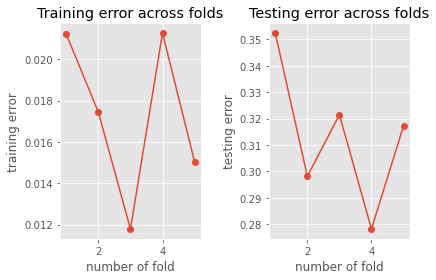

In [82]:
plt.subplot(1,2,1)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_training_error).ravel(), 'o-')
plt.xlabel('number of fold')
plt.ylabel('training error')
plt.title('Training error across folds')
plt.tight_layout()
plt.subplot(1,2,2)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_testing_error).ravel(), 'o-')
plt.xlabel('number of fold')
plt.ylabel('testing error')
plt.title('Testing error across folds')
plt.tight_layout()
plt.show()